# MNIST 분석 노트북
간단한 MNIST 파이프라인 예제입니다. 셀을 위에서부터 순서대로 실행하세요. 각 셀에는 한국어 설명이 포함되어 있습니다.

In [1]:
# 1) 데이터 로드
# - CSV 파일은 이 노트북에서 상대경로 '../data/' 아래에 있다고 가정합니다.
import pandas as pd
import numpy as np

# 학습/테스트 CSV 파일 읽기 (첫 열은 라벨, 나머지가 픽셀값이라고 가정)
df_train = pd.read_csv('../data/mnist_train.csv')
df_test = pd.read_csv('../data/mnist_test.csv')

# 간단 확인: 상위 몇 행 출력(노트북에서 실행하면 표로 보여집니다)
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# 1a) 테스트 데이터 확인(선택 실행)
# - df_test의 상위/요약 정보를 보고 싶을 때 실행하세요.
df_test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# 2) numpy 배열로 변환 및 형태 확인
# 설명: CSV로 읽은 pandas DataFrame에서 모델 입력으로 사용할 numpy 배열로 변환합니다.
# 가정: 첫 번째 컬럼이 라벨('label')이고, 나머지 784개 컬럼이 28x28 픽셀값입니다.
# 1) X_train 생성: DataFrame의 모든 행에서 2번째 컬럼(index=1)부터 끝까지 선택하여
#    각 행을 784차원(28x28) feature 벡터로 변환합니다.
X_train = np.array(df_train.iloc[:, 1:])
# 2) y_train 생성: 학습 데이터의 라벨 컬럼('label')을 추출하여 1차원 레이블 배열로 만듭니다.
y_train = np.array(df_train['label'])
# 3) X_test 생성: 테스트 데이터에 대해서도 동일하게 2번째 컬럼부터 끝까지 선택합니다.
X_test = np.array(df_test.iloc[:, 1:])
# 4) y_test 생성: 테스트 데이터의 정답 라벨을 1차원 배열로 저장합니다.
y_test = np.array(df_test['label'])

# 배열 형태 출력으로 데이터가 올바르게 로드되었는지 확인
print('df_train.shape =', df_train.shape, 'df_test.shape =', df_test.shape)
print('X_train.shape =', X_train.shape, 'y_train.shape =', y_train.shape, 'X_test.shape =', X_test.shape, 'y_test.shape =', y_test.shape)

df_train.shape = (60000, 785) df_test.shape = (10000, 785)
X_train.shape = (60000, 784) y_train.shape = (60000,) X_test.shape = (10000, 784) y_test.shape = (10000,)


In [18]:
# 3) 시각화용 샘플 인덱스 선택
# - 학습 데이터에서 무작위로 샘플 16개를 선택합니다.
import random
# 3-1) 설명: X_train.shape[0]은 학습 샘플(행)의 전체 개수입니다.
#        range(0, X_train.shape[0])는 가능한 인덱스 전체를 의미하고,
#        random.sample(..., k=16)는 그 중 중복 없이 무작위로 16개 인덱스를 뽑아
#        리스트 형태로 반환합니다. 즉 'samples'는 선택된 16개의 행 인덱스 리스트입니다.
samples = random.sample(range(0, X_train.shape[0]), k=16)
# 선택된 인덱스 출력(노트북에서 실행하면 리스트가 보입니다)
samples

[15102,
 41335,
 41447,
 4174,
 27909,
 17413,
 39165,
 3665,
 22059,
 4620,
 57897,
 51562,
 24529,
 10541,
 49282,
 10906]

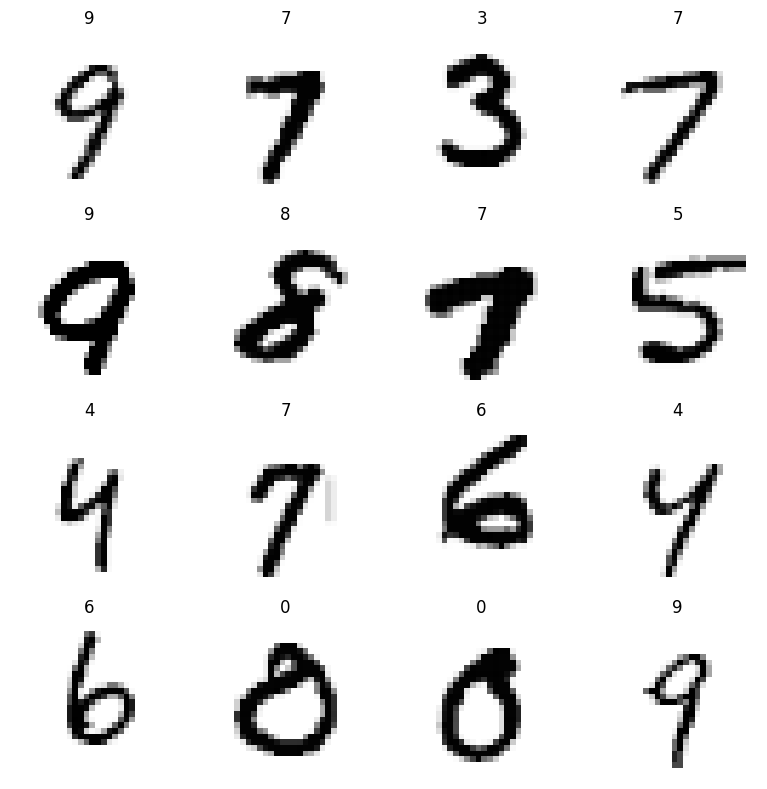

In [ ]:
# 4) 선택한 샘플 16개를 4x4 그리드로 시각화
# 4-1) matplotlib.pyplot 모듈을 불러옵니다 (플롯 관련 기능 사용)
import matplotlib.pyplot as plt
# 4-2) 전체 그림 크기 지정: figsize=(8,8)로 8x8인치 크기의 캔버스를 만듭니다.
plt.figure(figsize=(8,8))
# 4-3) 선택된 샘플 인덱스 리스트를 순회합니다. idx는 서브플롯 위치(0..15), n은 데이터 인덱스입니다.
for idx, n in enumerate(samples):
    # 4-4) 서브플롯을 4행x4열 그리드에서 (idx+1) 위치에 생성합니다 (subplot 인덱스는 1부터 시작).
    plt.subplot(4,4,idx+1)
    # 4-5) 이미지를 28x28 형태로 재배열하여 표시합니다. cmap='Greys'로 회색조 표시, interpolation은 시각 품질 조정입니다.
    plt.imshow(X_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    # 4-6) 각 이미지 위에 해당 샘플의 실제 라벨을 제목으로 표시합니다.
    plt.title(str(y_train[n]))
    # 4-7) 축(눈금 etc.)을 제거하여 이미지만 보이게 합니다.
    plt.axis('off')
# 4-8) 서브플롯 간 여백을 자동으로 조정하여 레이아웃 겹침을 방지합니다.
plt.tight_layout()
# 4-9) 캔버스에 그려진 플롯을 화면에 출력합니다.
plt.show()

In [ ]:
# 5) 간단한 KNN 모델 학습 (n_neighbors=5)
# 5-1) sklearn의 KNN 분류기 클래스를 가져옵니다.
from sklearn.neighbors import KNeighborsClassifier
# 5-2) 학습 소요 시간 측정을 위해 time 모듈을 가져옵니다.
import time
# 5-3) 학습 시작 시간을 기록합니다 (종료 후 소요시간 계산에 사용).
start_time = time.time()
# 5-4) KNeighborsClassifier 인스턴스를 생성합니다 (이웃 수 = 5).
clf = KNeighborsClassifier(n_neighbors=5)
# 5-5) 모델을 학습시킵니다: X_train(특징), y_train(레이블)을 전달합니다.
clf.fit(X_train, y_train)
# 5-6) 학습이 끝난 후 경과시간을 출력합니다.
print('Fit time :', time.time() - start_time)

Fit time : 0.15983867645263672


In [7]:
# 6) 학습된 KNN으로 테스트 데이터 예측 및 정확도 측정
from sklearn.metrics import accuracy_score
import time
start_time = time.time()
pred = clf.predict(X_test)
print('Predict time :', time.time() - start_time)
print('Accuracy :', accuracy_score(y_test, pred))

Predict time : 18.43587303161621
Accuracy : 0.9688


In [8]:
# 7) PCA + KNN 파이프라인에 대해 GridSearchCV로 하이퍼파라미터 탐색
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([('pca', PCA()), ('clf', KNeighborsClassifier())])
parameters = {'pca__n_components': [2,5,10], 'clf__n_neighbors': [5,10,15]}
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)
grid = GridSearchCV(pipe, parameters, cv=kf, n_jobs=-1, verbose=1)
# 주의: 아래 fit은 시간이 오래 걸릴 수 있습니다. 필요하면 파라미터 범위를 줄이세요.
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


,estimator,Pipeline(step...lassifier())])
,param_grid,"{'clf__n_neighbors': [5, 10, ...], 'pca__n_components': [2, 5, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_components,10


In [9]:
# 8) GridSearch 결과 요약
print('Best score : %0.3f' % grid.best_score_)
print('Best parameters set :')
best_parameters = grid.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('	%s: %r' % (param_name, best_parameters[param_name]))

Best score : 0.931
Best parameters set :
	clf__n_neighbors: 10
	pca__n_components: 10


In [10]:
# 9) 테스트셋에 대한 최종 평가
from sklearn.metrics import accuracy_score, classification_report
test_pred = grid.best_estimator_.predict(X_test)
print('Test accuracy :', accuracy_score(y_test, test_pred))
print('Classification report (test):')
print(classification_report(y_test, test_pred))

Test accuracy : 0.9288
Classification report (test):
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.99      0.97      1135
           2       0.95      0.95      0.95      1032
           3       0.93      0.90      0.92      1010
           4       0.92      0.90      0.91       982
           5       0.91      0.91      0.91       892
           6       0.95      0.96      0.95       958
           7       0.95      0.92      0.94      1028
           8       0.90      0.88      0.89       974
           9       0.86      0.88      0.87      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



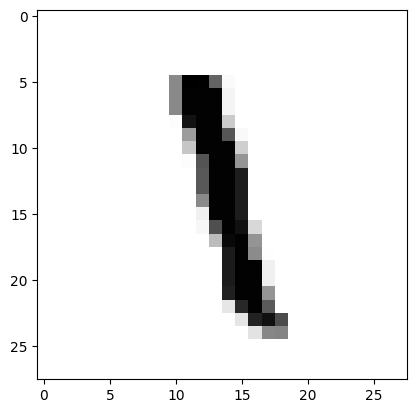

Predicted : [1]
True     : 1


In [11]:
# 10) 단일 샘플 시각화 및 예측 확인
import matplotlib.pyplot as plt
n = 700  # 테스트셋 인덱스(원하면 변경)
plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()
print('Predicted :', grid.best_estimator_.predict(X_test[n].reshape(1,-1)))
print('True     :', y_test[n])

In [12]:
# 11) 전체 테스트셋 예측값을 preds에 저장(잘못 분류 샘플 시각화에 사용)
preds = grid.best_estimator_.predict(X_test)
preds[:20]  # 앞 20개만 미리 보기

array([7, 2, 1, 0, 4, 1, 4, 9, 2, 7, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

In [13]:
# 12) y_test(정답) 출력(간단 확인용)
y_test[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

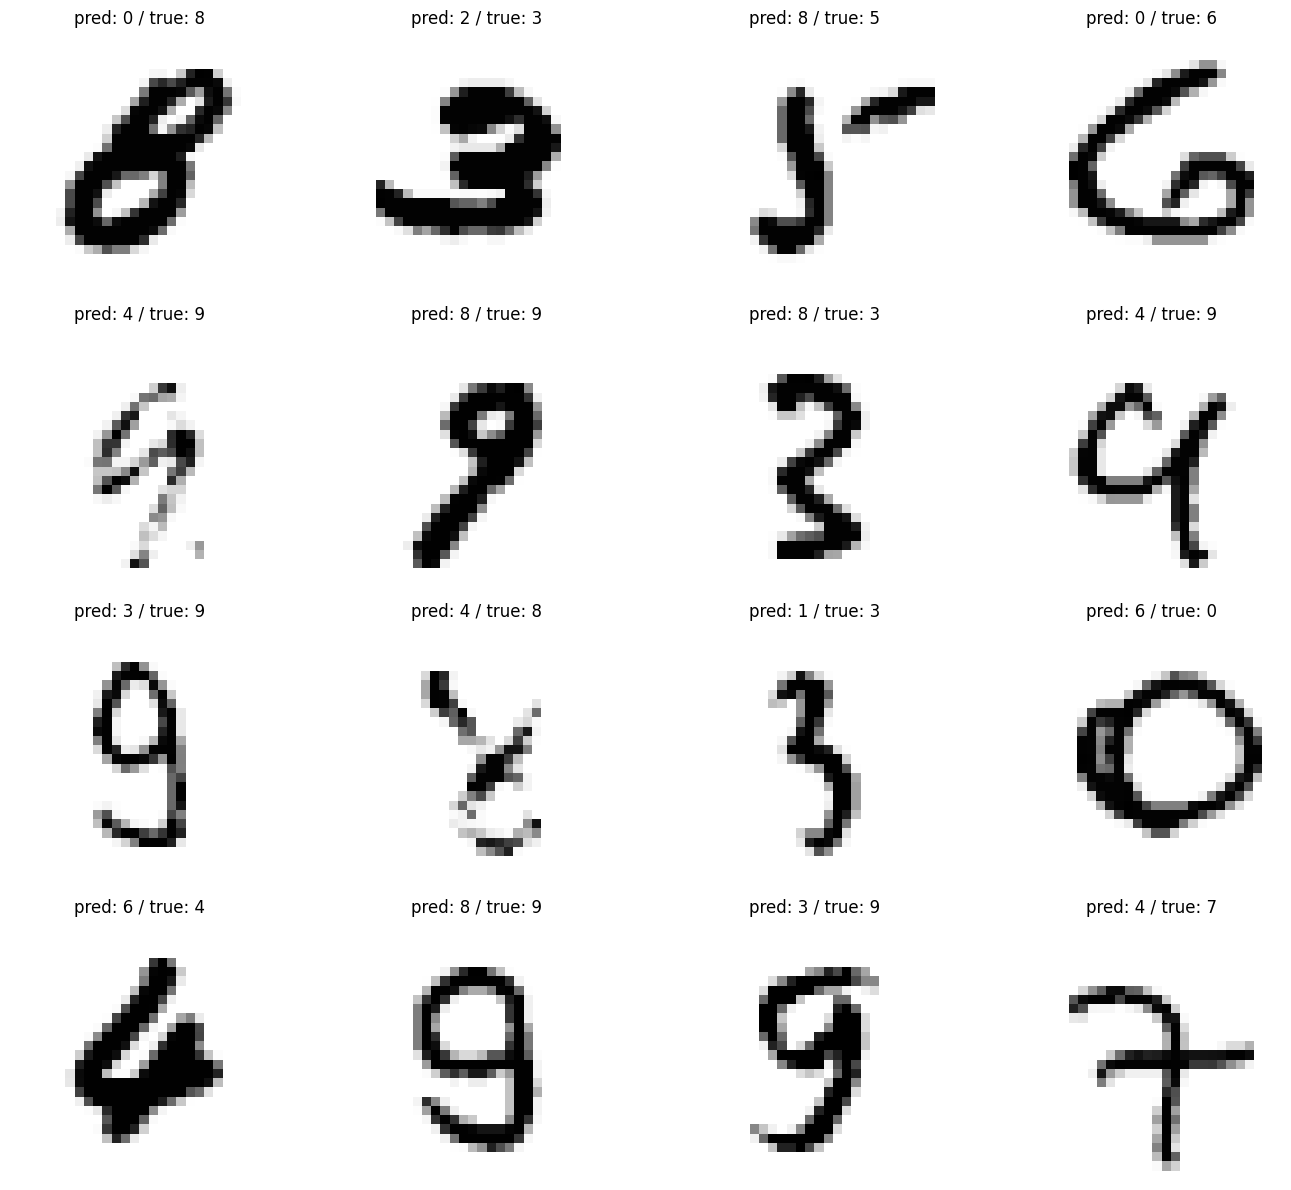

In [14]:
# 13) 잘못 분류된 샘플 시각화 (최대 16개)
import matplotlib.pyplot as plt
import numpy as np
import random
wrong_idx = np.where(y_test != preds)[0]
if wrong_idx.size == 0:
    print('잘못 분류된 샘플이 없습니다.')
else:
    k = min(16, wrong_idx.size)
    samples = random.sample(list(wrong_idx), k)
    plt.figure(figsize=(14,12))
    for idx, n in enumerate(samples):
        plt.subplot(4,4,idx+1)
        plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
        plt.title(f'pred: {preds[n]} / true: {y_test[n]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()